In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from pyod.models.knn import KNN 

from sklearn.feature_selection import( 
    RFECV,
    SequentialFeatureSelector,
    SelectFromModel
)

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import(
    RandomForestClassifier,
    HistGradientBoostingClassifier
)

# models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    HistGradientBoostingClassifier
)

# scripts 
from src.wrapped import Wrapped
from src.analysesV02 import Analytics
from src.trainV02 import TrainModels

In [2]:
# classes
ac = Analytics()
tm = TrainModels()
wp = Wrapped(
    '../data/row/',
    '../data/processed/',
    '../data/files/'
)

# models
models = np.array([
    GaussianNB(),
    KNeighborsClassifier(), 
    DecisionTreeClassifier(), 
    RandomForestClassifier(), 
    HistGradientBoostingClassifier(),
    LGBMClassifier(),
    MLPClassifier(),
    SVC(),
])

models_class_weight = np.array([
    DecisionTreeClassifier(class_weight='balanced'), 
    RandomForestClassifier(class_weight='balanced', random_state = 0, n_jobs = -1), 
    LGBMClassifier(class_weight='balanced'),
])

# Importando dados para treinamento

In [3]:
df = wp.load_data('df_instrumentos_features_selecionadas')

In [4]:
# instrumentos de corda:
inst_corda = ["cello", "guitar", "violin", "bass", "banjo", "mandolin", "ukulele"]

df = df[df['instrumento'].isin(inst_corda)]

- Definindo as variaveis de treino e o target

In [5]:
le = LabelEncoder()
df['labels'] = le.fit_transform(df.instrumento)

In [6]:
X = df.drop(columns=['labels', 'instrumento','file_name'])
y = df['labels']

# TESTE 1: Balanceamento

- 1° Opção: Balanceamento das classes com SMOTH

In [7]:
t1_acuracy_models = [tm.cross_validate_balancead(k=5, model=model, X=X, y=y.to_frame()) for model in models]

dict_results_t1 = {
    'Naive Bayes': t1_acuracy_models[0],
    'KNN': t1_acuracy_models[1],
    'Arvore de Decisão': t1_acuracy_models[2],
    'Floresta Aleatoria': t1_acuracy_models[3],
    'HistGradientBoosting': t1_acuracy_models[4],
    'LIGHTGBM': t1_acuracy_models[5],
    'MLP': t1_acuracy_models[6],
    'SVC': t1_acuracy_models[7],
}

dict_results_t1

Acuracia do modelo GaussianNB() do Fold 0: 0.4113345521023766
Acuracia do modelo GaussianNB() do Fold 1: 0.39488117001828155
Acuracia do modelo GaussianNB() do Fold 2: 0.4633699633699634
Acuracia do modelo GaussianNB() do Fold 3: 0.46153846153846156
Acuracia do modelo GaussianNB() do Fold 4: 0.4139194139194139
Acuracia do modelo KNeighborsClassifier() do Fold 0: 0.2961608775137112
Acuracia do modelo KNeighborsClassifier() do Fold 1: 0.28884826325411334
Acuracia do modelo KNeighborsClassifier() do Fold 2: 0.32051282051282054
Acuracia do modelo KNeighborsClassifier() do Fold 3: 0.30952380952380953
Acuracia do modelo KNeighborsClassifier() do Fold 4: 0.30036630036630035
Acuracia do modelo DecisionTreeClassifier() do Fold 0: 0.3235831809872029
Acuracia do modelo DecisionTreeClassifier() do Fold 1: 0.3510054844606947
Acuracia do modelo DecisionTreeClassifier() do Fold 2: 0.3608058608058608
Acuracia do modelo DecisionTreeClassifier() do Fold 3: 0.3534798534798535
Acuracia do modelo DecisionT

{'Naive Bayes': 0.4290087121896994,
 'KNN': 0.36604556321192516,
 'Arvore de Decisão': 0.3594547236229137,
 'Floresta Aleatoria': 0.40237057275448496,
 'HistGradientBoosting': 0.4287062967501724,
 'LIGHTGBM': 0.4452879844104706,
 'MLP': 0.42926078883247865,
 'SVC': 0.4207621826680327}

- 2° Opção: Class Weight

In [8]:
acuracy_models_class_weight  = [tm.cross_validate_balancead(k=5, model=model, X=X, y=y.to_frame(), weight=True) for model in models_class_weight]

dict_results_class_weight = {
    'Arvore de Decisão': acuracy_models_class_weight[0],
    'Floresta Aleatoria': acuracy_models_class_weight[1],
    'LIGHTGBM': acuracy_models_class_weight[2],
}

dict_results_class_weight

Acuracia do modelo DecisionTreeClassifier(class_weight='balanced') do Fold 0: 0.33455210237659966
Acuracia do modelo DecisionTreeClassifier(class_weight='balanced') do Fold 1: 0.34186471663619744
Acuracia do modelo DecisionTreeClassifier(class_weight='balanced') do Fold 2: 0.3498168498168498
Acuracia do modelo DecisionTreeClassifier(class_weight='balanced') do Fold 3: 0.36996336996337
Acuracia do modelo DecisionTreeClassifier(class_weight='balanced') do Fold 4: 0.3516483516483517
Acuracia do modelo RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0) do Fold 0: 0.5283363802559415
Acuracia do modelo RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0) do Fold 1: 0.4990859232175503
Acuracia do modelo RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0) do Fold 2: 0.5347985347985348
Acuracia do modelo RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0) do Fold 3: 0.5128205128205128
Acuracia do modelo 

{'Arvore de Decisão': 0.4128518377147261,
 'Floresta Aleatoria': 0.42376345166107504,
 'LIGHTGBM': 0.4342220850447542}

# TESTE 2: Remover Outlier

- Treinar modelo de classificação de outilier

In [9]:
detector_outilier = KNN()

new_df = df.drop(columns=['instrumento','file_name'])

detector_outilier.fit(new_df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

- Checar numeros de outilers e não outilers<br/>
**0 (False) Não é outiler**<br/>
**1 (True) É outiler**

In [10]:
previsions = detector_outilier.labels_
np.unique(previsions, return_counts=True)

(array([0, 1]), array([2458,  274]))

- Distancia euclidiana dos registros

In [11]:
confiance_previsions = detector_outilier.decision_scores_
confiance_previsions

array([ 420.42515301,  373.65251402,  472.76119518, ...,  356.52528336,
       2043.19364258,  387.526779  ])

- Grafico

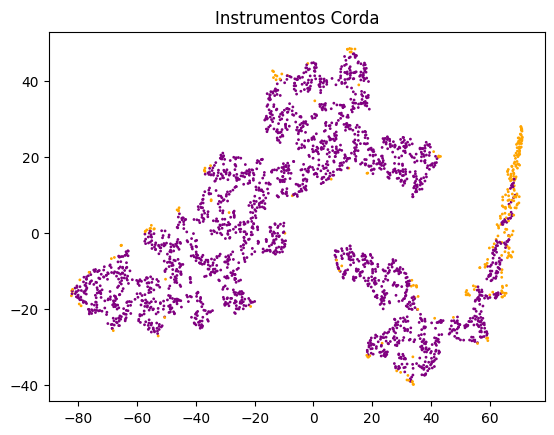

In [12]:
ac.graphic_anomalies(df, previsions,'Instrumentos Corda')

- Checar os outilers

In [13]:
# pegando indice dos registros que são outilers
outilers_id = [previsions[i] == 1 for i in range(previsions.shape[0])]
outilers = df.iloc[outilers_id,:]
outilers

tonnetz0  tonnetz1   chroma1   chroma2   chroma3   chroma4   chroma5  \
524   0.044009  0.049910  0.422762  0.372759  0.418751  0.342388  0.345684   
546  -0.019221  0.017872  0.412917  0.454047  0.530891  0.557669  0.349409   
548   0.104703 -0.251793  0.163021  0.812954  0.344378  0.115020  0.292584   
555  -0.035994  0.023556  0.502060  0.572897  0.544631  0.463271  0.181727   
570   0.128059  0.082795  0.264848  0.264230  0.504677  0.353699  0.363608   
...        ...       ...       ...       ...       ...       ...       ...   
7999  0.188614 -0.123051  0.435805  0.078954  0.048469  0.095815  0.166382   
8016  0.066705 -0.239727  0.177657  0.249958  0.202065  0.227559  0.358576   
8017  0.096697 -0.279816  0.159033  0.078111  0.079078  0.180735  0.292732   
8020  0.015595 -0.058762  0.120028  0.238263  0.234643  0.267743  0.228591   
8022  0.004588 -0.009204  0.124913  0.174113  0.185558  0.169614  0.149416   

       chroma6   chroma7       mfcc0  ...  spectral_centroid  spectral_onset  \
524   0.425205  0.419690 -113.403656  ...        2589.236162        1.418300   
546   0.344261  0.382070 -202.772339  ...        3004.965818        1.600475   
548   0.153532  0.169621 -140.371948  ...        1704.019101        1.065461   
555   0.342575  0.116119 -176.971466  ...        2065.352164        1.527929   
570   0.434325  0.461813  -43.627769  ...        3178.869223        1.445494   
...        ...       ...         ...  ...                ...             ...   
7999  0.088318  0.250419 -390.158630  ...        1772.864514        1.268380   
8016  0.191313  0.535777 -163.197540  ...        2049.088272        1.239214   
8017  0.125269  0.363708 -115.140617  ...        2277.244488        1.186836   
8020  0.260930  0.267262 -324.705627  ...        3573.542978        1.354204   
8022  0.075544  0.081894 -414.280731  ...        3720.081212        1.332893   

      spectral_rolloff  spectogram  mel_spectogram  zero_crossing_rate  \
524        5736.500270  -55.941154      -70.428162            0.124409   
546        5830.002334  -78.944046      -80.000000            0.175861   
548        2712.683983  -69.137093      -79.591011            0.129967   
555        3548.731828  -65.745941      -79.547966            0.154887   
570        6845.210425  -47.192692      -59.145737            0.158472   
...                ...         ...             ...                 ...   
7999       2945.977004  -76.595161      -80.000000            0.126178   
8016       3472.241494  -45.379463      -80.000000            0.128462   
8017       3779.127109  -50.537724      -80.000000            0.143759   
8020       6552.813508  -43.596504      -73.498703            0.230540   
8022       6207.732687  -37.720039      -72.552101            0.241853   

      zero_crossing  instrumento          file_name  labels  
524           27503        banjo   004313_23040.ogg       0  
546           38878        banjo  010368_199680.ogg       0  
548           28745        banjo   010444_30720.ogg       0  
555           34292        banjo  012743_192000.ogg       0  
570           35001        banjo   014956_57600.ogg       0  
...             ...          ...                ...     ...  
7999          27872       violin       147132_0.ogg       6  
8016          28414       violin  151275_138240.ogg       6  
8017          31806       violin   151281_61440.ogg       6  
8020          50962       violin  154469_318720.ogg       6  
8022          53491       violin   154881_76800.ogg       6  

[274 rows x 47 columns]

In [14]:
outilers.instrumento.value_counts()

violin      85
bass        55
banjo       35
guitar      35
ukulele     29
mandolin    24
cello       11
Name: instrumento, dtype: int64

- Agora vamos remover os outilers da nossa base

In [15]:
# pegando indice dos registros que não são outilers
outilers_id =[previsions[i] == 0 for i in range(previsions.shape[0])]
df_train = df.iloc[outilers_id,:]
df_train

tonnetz0  tonnetz1   chroma1   chroma2   chroma3   chroma4   chroma5  \
511  -0.126759 -0.059743  0.413241  0.216319  0.150052  0.123013  0.273308   
512  -0.031109 -0.064497  0.226724  0.379728  0.534193  0.384524  0.330155   
513   0.009446  0.006492  0.469337  0.108270  0.112574  0.109360  0.286641   
514   0.037982 -0.073602  0.340242  0.296036  0.302441  0.279111  0.539927   
515   0.062163 -0.025827  0.641626  0.313273  0.320937  0.305392  0.414052   
...        ...       ...       ...       ...       ...       ...       ...   
8015  0.155398  0.202623  0.279203  0.175173  0.329897  0.101118  0.119236   
8018  0.181463 -0.109062  0.259089  0.054198  0.135665  0.120070  0.198278   
8019  0.051950  0.691044  0.773323  0.582712  0.532384  0.274606  0.127275   
8021  0.093624 -0.031124  0.253249  0.321181  0.309254  0.265595  0.265015   
8023  0.158450  0.087372  0.537541  0.238255  0.197415  0.234096  0.413693   

       chroma6   chroma7       mfcc0  ...  spectral_centroid  spectral_onset  \
511   0.355497  0.252558 -181.227707  ...        1463.383714        1.480360   
512   0.257401  0.416313  -92.888756  ...        1895.418478        1.607456   
513   0.663893  0.309304 -113.852753  ...        1627.584519        1.189757   
514   0.324625  0.385215 -175.193634  ...        2266.128437        1.524973   
515   0.317208  0.248327  -72.022423  ...        1838.567834        1.174259   
...        ...       ...         ...  ...                ...             ...   
8015  0.150895  0.161468 -106.568298  ...        2266.961445        1.172216   
8018  0.268761  0.094458 -233.943954  ...        1356.828177        0.969832   
8019  0.109617  0.158079 -260.673492  ...         658.017342        1.227272   
8021  0.155659  0.181344 -128.199768  ...        1421.358194        1.173742   
8023  0.344178  0.151779  -94.144447  ...        1946.691119        1.060153   

      spectral_rolloff  spectogram  mel_spectogram  zero_crossing_rate  \
511        2798.641932  -55.223148      -79.620255            0.084137   
512        3952.566819  -42.981918      -79.185867            0.083941   
513        2740.437335  -61.928226      -80.000000            0.084799   
514        4315.358824  -29.665657      -71.880913            0.120456   
515        3889.366118  -61.702564      -79.314026            0.087291   
...                ...         ...             ...                 ...   
8015       4213.738093  -42.284138      -79.955719            0.133785   
8018       2408.271439  -62.397167      -78.355164            0.083315   
8019       1367.932950  -35.302883      -68.164001            0.019043   
8021       2751.578644  -48.512993      -66.277359            0.065123   
8023       4276.888833  -54.351154      -66.739700            0.097089   

      zero_crossing  instrumento          file_name  labels  
511           18597        banjo  000202_142080.ogg       0  
512           18554        banjo   000606_15360.ogg       0  
513           18757        banjo  000725_445440.ogg       0  
514           26623        banjo   001490_23040.ogg       0  
515           19287        banjo   001691_15360.ogg       0  
...             ...          ...                ...     ...  
8015          29606       violin   151094_42240.ogg       6  
8018          18430       violin   151790_99840.ogg       6  
8019           4212       violin   152864_26880.ogg       6  
8021          14407       violin   154677_26880.ogg       6  
8023          21458       violin   155127_84480.ogg       6  

[2458 rows x 47 columns]

- Treinar modelos sem outlier e balanceameto

In [16]:
X_rm_outilers = df_train.drop(columns=['labels', 'instrumento','file_name'])
y_rm_outilers = df_train['labels'].to_frame()

t2_acuracy_models = [tm.cross_validate_balancead(k=5, model=model,X=X_rm_outilers,  y=y_rm_outilers) for model in models]

dict_results_t2 = {
    'Naive Bayes': t2_acuracy_models[0],
    'KNN': t2_acuracy_models[1],
    'Arvore de Decisão': t2_acuracy_models[2],
    'Floresta Aleatoria': t2_acuracy_models[3],
    'HistGradientBoosting': t2_acuracy_models[4],
    'LIGHTGBM': t2_acuracy_models[5],
    'MLP': t2_acuracy_models[6],
    'SVC': t2_acuracy_models[7],
}

dict_results_t2

Acuracia do modelo GaussianNB() do Fold 0: 0.4105691056910569
Acuracia do modelo GaussianNB() do Fold 1: 0.39227642276422764
Acuracia do modelo GaussianNB() do Fold 2: 0.4715447154471545
Acuracia do modelo GaussianNB() do Fold 3: 0.4623217922606925
Acuracia do modelo GaussianNB() do Fold 4: 0.45213849287169044
Acuracia do modelo KNeighborsClassifier() do Fold 0: 0.2926829268292683
Acuracia do modelo KNeighborsClassifier() do Fold 1: 0.2784552845528455
Acuracia do modelo KNeighborsClassifier() do Fold 2: 0.3130081300813008
Acuracia do modelo KNeighborsClassifier() do Fold 3: 0.3014256619144603
Acuracia do modelo KNeighborsClassifier() do Fold 4: 0.3095723014256619
Acuracia do modelo DecisionTreeClassifier() do Fold 0: 0.3252032520325203
Acuracia do modelo DecisionTreeClassifier() do Fold 1: 0.3617886178861789
Acuracia do modelo DecisionTreeClassifier() do Fold 2: 0.37601626016260165
Acuracia do modelo DecisionTreeClassifier() do Fold 3: 0.3604887983706721
Acuracia do modelo DecisionTree

{'Naive Bayes': 0.434517753441605,
 'KNN': 0.4240955309430744,
 'Arvore de Decisão': 0.4192303131195268,
 'Floresta Aleatoria': 0.4258357405694768,
 'HistGradientBoosting': 0.4325307964118215,
 'LIGHTGBM': 0.4388686146945216,
 'MLP': 0.43297624467440693,
 'SVC': 0.4290948395057865}

# TESTE 3: Features por Correlação

In [17]:
df_corr = df.drop(columns=['instrumento', 'file_name', 'labels']).corr().unstack().reset_index().dropna()
df_corr.rename(columns = {'level_0': 'features_a', 'level_1': 'features_b', 0:'correlacao'}, inplace = True)
df_corr

features_a          features_b  correlacao
0          tonnetz0            tonnetz0    1.000000
1          tonnetz0            tonnetz1    0.022123
2          tonnetz0             chroma1   -0.159354
3          tonnetz0             chroma2   -0.167101
4          tonnetz0             chroma3    0.171987
...             ...                 ...         ...
1931  zero_crossing    spectral_rolloff    0.778658
1932  zero_crossing          spectogram   -0.108128
1933  zero_crossing      mel_spectogram   -0.144471
1934  zero_crossing  zero_crossing_rate    0.999998
1935  zero_crossing       zero_crossing    1.000000

[1936 rows x 3 columns]

- Correlação Positia

In [18]:
corr_posit = df_corr.query('correlacao > 0.5 and correlacao < 1.0')
corr_posit

features_a          features_b  correlacao
181              chroma3             chroma4    0.501827
224              chroma4             chroma3    0.501827
271              chroma5             chroma6    0.583305
314              chroma6             chroma5    0.583305
587                mfcc4               mfcc6    0.516223
...                  ...                 ...         ...
1891  zero_crossing_rate       zero_crossing    0.999998
1926       zero_crossing      spectral_band2    0.542811
1929       zero_crossing   spectral_centroid    0.879911
1931       zero_crossing    spectral_rolloff    0.778658
1934       zero_crossing  zero_crossing_rate    0.999998

[68 rows x 3 columns]

In [19]:
len(corr_posit.features_a.unique()), corr_posit.features_a.unique()

(27,
 array(['chroma3', 'chroma4', 'chroma5', 'chroma6', 'mfcc4', 'mfcc5',
        'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
        'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'spectral_band2',
        'spectral_band3', 'spectral_band4', 'spectral_centroid',
        'spectral_rolloff', 'spectogram', 'mel_spectogram',
        'zero_crossing_rate', 'zero_crossing'], dtype=object))

In [21]:
X =  df[corr_posit.features_a.unique()]
y = df['labels'].to_frame()

t3_acuracy_models_corr_posit = [tm.cross_validate_balancead(k=5, model=model,X=X,  y=y) for model in models]

dict_results_t3_corr_posit = {
    'Naive Bayes': t3_acuracy_models_corr_posit[0],
    'KNN': t3_acuracy_models_corr_posit[1],
    'Arvore de Decisão': t3_acuracy_models_corr_posit[2],
    'Floresta Aleatoria': t3_acuracy_models_corr_posit[3],
    'HistGradientBoosting': t3_acuracy_models_corr_posit[4],
    'LIGHTGBM': t3_acuracy_models_corr_posit[5],
    'MLP': t3_acuracy_models_corr_posit[6],
    'SVC': t3_acuracy_models_corr_posit[7],
}

dict_results_t3_corr_posit

Acuracia do modelo GaussianNB() do Fold 0: 0.39488117001828155
Acuracia do modelo GaussianNB() do Fold 1: 0.3619744058500914
Acuracia do modelo GaussianNB() do Fold 2: 0.4194139194139194
Acuracia do modelo GaussianNB() do Fold 3: 0.43772893772893773
Acuracia do modelo GaussianNB() do Fold 4: 0.3772893772893773
Acuracia do modelo KNeighborsClassifier() do Fold 0: 0.3016453382084095
Acuracia do modelo KNeighborsClassifier() do Fold 1: 0.283363802559415
Acuracia do modelo KNeighborsClassifier() do Fold 2: 0.3131868131868132
Acuracia do modelo KNeighborsClassifier() do Fold 3: 0.31135531135531136
Acuracia do modelo KNeighborsClassifier() do Fold 4: 0.29853479853479853
Acuracia do modelo DecisionTreeClassifier() do Fold 0: 0.29250457038391225
Acuracia do modelo DecisionTreeClassifier() do Fold 1: 0.31444241316270566
Acuracia do modelo DecisionTreeClassifier() do Fold 2: 0.2857142857142857
Acuracia do modelo DecisionTreeClassifier() do Fold 3: 0.2875457875457875
Acuracia do modelo DecisionTr

{'Naive Bayes': 0.4195704222395974,
 'KNN': 0.4150337603368803,
 'Arvore de Decisão': 0.41065648299726243,
 'Floresta Aleatoria': 0.41290662738827866,
 'HistGradientBoosting': 0.41493891909330166,
 'LIGHTGBM': 0.41662788661575806,
 'MLP': 0.4121726271399545,
 'SVC': 0.4105591287321732}

- Correlação Negativa

In [22]:
corr_negat = df_corr.query('correlacao > -1.0 and correlacao < -0.5')
corr_negat

features_a          features_b  correlacao
474                mfcc1      spectral_band2   -0.824213
475                mfcc1      spectral_band3   -0.764968
476                mfcc1      spectral_band4   -0.682582
477                mfcc1   spectral_centroid   -0.845359
479                mfcc1    spectral_rolloff   -0.827660
482                mfcc1  zero_crossing_rate   -0.666717
483                mfcc1       zero_crossing   -0.666821
1506      spectral_band2               mfcc1   -0.824213
1550      spectral_band3               mfcc1   -0.764968
1594      spectral_band4               mfcc1   -0.682582
1638   spectral_centroid               mfcc1   -0.845359
1726    spectral_rolloff               mfcc1   -0.827660
1858  zero_crossing_rate               mfcc1   -0.666717
1902       zero_crossing               mfcc1   -0.666821

In [23]:
len(corr_negat.features_b.unique()), corr_negat.features_b.unique()

(8,
 array(['spectral_band2', 'spectral_band3', 'spectral_band4',
        'spectral_centroid', 'spectral_rolloff', 'zero_crossing_rate',
        'zero_crossing', 'mfcc1'], dtype=object))

In [24]:
X = df[corr_negat.features_b.unique()]
y = df['labels'].to_frame()

t3_acuracy_models_corr_neg = [tm.cross_validate_balancead(k=5, model=model,X=X,  y=y) for model in models]

dict_results_t3_corr_neg = {
    'Naive Bayes': t3_acuracy_models_corr_neg[0],
    'KNN': t3_acuracy_models_corr_neg[1],
    'Arvore de Decisão': t3_acuracy_models_corr_neg[2],
    'Floresta Aleatoria': t3_acuracy_models_corr_neg[3],
    'HistGradientBoosting': t3_acuracy_models_corr_neg[4],
    'LIGHTGBM': t3_acuracy_models_corr_neg[5],
    'MLP': t3_acuracy_models_corr_neg[6],
    'SVC': t3_acuracy_models_corr_neg[7],
}

dict_results_t3_corr_neg

Acuracia do modelo GaussianNB() do Fold 0: 0.31078610603290674
Acuracia do modelo GaussianNB() do Fold 1: 0.28884826325411334
Acuracia do modelo GaussianNB() do Fold 2: 0.33882783882783885
Acuracia do modelo GaussianNB() do Fold 3: 0.326007326007326
Acuracia do modelo GaussianNB() do Fold 4: 0.2802197802197802
Acuracia do modelo KNeighborsClassifier() do Fold 0: 0.2979890310786106
Acuracia do modelo KNeighborsClassifier() do Fold 1: 0.2870201096892139
Acuracia do modelo KNeighborsClassifier() do Fold 2: 0.315018315018315
Acuracia do modelo KNeighborsClassifier() do Fold 3: 0.31135531135531136
Acuracia do modelo KNeighborsClassifier() do Fold 4: 0.30036630036630035
Acuracia do modelo DecisionTreeClassifier() do Fold 0: 0.2760511882998172
Acuracia do modelo DecisionTreeClassifier() do Fold 1: 0.2870201096892139
Acuracia do modelo DecisionTreeClassifier() do Fold 2: 0.2802197802197802
Acuracia do modelo DecisionTreeClassifier() do Fold 3: 0.27472527472527475
Acuracia do modelo DecisionTre

{'Naive Bayes': 0.4074796964332708,
 'KNN': 0.4043876410529261,
 'Arvore de Decisão': 0.40080269776279026,
 'Floresta Aleatoria': 0.4001621245731022,
 'HistGradientBoosting': 0.39964529514907354,
 'LIGHTGBM': 0.39905939579763167,
 'MLP': 0.39539734705444973,
 'SVC': 0.39450768227737937}

- Se combinarmos as duas abordagens ?

In [25]:
features = np.append(corr_posit.features_b.unique(), corr_negat.features_b.unique())
features

array(['chroma4', 'chroma3', 'chroma6', 'chroma5', 'mfcc6', 'mfcc8',
       'mfcc4', 'mfcc5', 'mfcc7', 'mfcc10', 'mfcc9', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'spectral_band3',
       'spectral_band4', 'spectral_centroid', 'spectral_rolloff',
       'zero_crossing_rate', 'zero_crossing', 'spectral_band2',
       'mel_spectogram', 'spectogram', 'spectral_band2', 'spectral_band3',
       'spectral_band4', 'spectral_centroid', 'spectral_rolloff',
       'zero_crossing_rate', 'zero_crossing', 'mfcc1'], dtype=object)

In [26]:
features = np.append(corr_posit.features_b.unique(), corr_negat.features_b.unique())
features = np.unique(features)

X = df[features]
y = df['labels'].to_frame()

t3_combine_corr = [tm.cross_validate_balancead(k=5, model=model, X=X, y=y) for model in models]

dict_results_t3_cb = {
    'Naive Bayes': t3_combine_corr[0],
    'KNN': t3_combine_corr[1],
    'Arvore de Decisão': t3_combine_corr[2],
    'Floresta Aleatoria': t3_combine_corr[3],
    'HistGradientBoosting': t3_combine_corr[4],
    'LIGHTGBM': t3_combine_corr[5],
    'MLP': t3_combine_corr[6],
    'SVC': t3_combine_corr[7],
}

dict_results_t3_cb

Acuracia do modelo GaussianNB() do Fold 0: 0.40036563071297987
Acuracia do modelo GaussianNB() do Fold 1: 0.360146252285192
Acuracia do modelo GaussianNB() do Fold 2: 0.4175824175824176
Acuracia do modelo GaussianNB() do Fold 3: 0.42124542124542125
Acuracia do modelo GaussianNB() do Fold 4: 0.36996336996337
Acuracia do modelo KNeighborsClassifier() do Fold 0: 0.30347349177330896
Acuracia do modelo KNeighborsClassifier() do Fold 1: 0.283363802559415
Acuracia do modelo KNeighborsClassifier() do Fold 2: 0.3131868131868132
Acuracia do modelo KNeighborsClassifier() do Fold 3: 0.31135531135531136
Acuracia do modelo KNeighborsClassifier() do Fold 4: 0.29853479853479853
Acuracia do modelo DecisionTreeClassifier() do Fold 0: 0.27787934186471663
Acuracia do modelo DecisionTreeClassifier() do Fold 1: 0.3071297989031079
Acuracia do modelo DecisionTreeClassifier() do Fold 2: 0.304029304029304
Acuracia do modelo DecisionTreeClassifier() do Fold 3: 0.304029304029304
Acuracia do modelo DecisionTreeCla

{'Naive Bayes': 0.39449190023056224,
 'KNN': 0.39228930364130904,
 'Arvore de Decisão': 0.39019768759154716,
 'Floresta Aleatoria': 0.3922026279763097,
 'HistGradientBoosting': 0.39376082038283833,
 'LIGHTGBM': 0.39535433367406064,
 'MLP': 0.393297791566918,
 'SVC': 0.39262298296046666}

- Correlação de -0.5 a 0.5

In [27]:
corr_prox_zero = df_corr.query('correlacao > -0.5 and correlacao < 0.5')
corr_prox_zero

features_a      features_b  correlacao
1          tonnetz0        tonnetz1    0.022123
2          tonnetz0         chroma1   -0.159354
3          tonnetz0         chroma2   -0.167101
4          tonnetz0         chroma3    0.171987
5          tonnetz0         chroma4   -0.218063
...             ...             ...         ...
1927  zero_crossing  spectral_band3    0.394094
1928  zero_crossing  spectral_band4    0.263385
1930  zero_crossing  spectral_onset    0.274916
1932  zero_crossing      spectogram   -0.108128
1933  zero_crossing  mel_spectogram   -0.144471

[1810 rows x 3 columns]

In [28]:
len(corr_prox_zero.features_b.unique())

44

In [29]:
X =  df[corr_prox_zero.features_b.unique()]
y = df['labels'].to_frame()

t3_acuracy_models_corr_prox_zero = [tm.cross_validate_balancead(k=5, model=model, X=X, y=y) for model in models]

dict_results_t3_corr = {
    'Naive Bayes': t3_acuracy_models_corr_prox_zero[0],
    'KNN': t3_acuracy_models_corr_prox_zero[1],
    'Arvore de Decisão': t3_acuracy_models_corr_prox_zero[2],
    'Floresta Aleatoria': t3_acuracy_models_corr_prox_zero[3],
    'HistGradientBoosting': t3_acuracy_models_corr_prox_zero[4],
    'LIGHTGBM': t3_acuracy_models_corr_prox_zero[5],
    'MLP': t3_acuracy_models_corr_prox_zero[6],
    'SVC': t3_acuracy_models_corr_prox_zero[7],
}

dict_results_t3_corr

Acuracia do modelo GaussianNB() do Fold 0: 0.4113345521023766
Acuracia do modelo GaussianNB() do Fold 1: 0.39488117001828155
Acuracia do modelo GaussianNB() do Fold 2: 0.4633699633699634
Acuracia do modelo GaussianNB() do Fold 3: 0.46153846153846156
Acuracia do modelo GaussianNB() do Fold 4: 0.4139194139194139
Acuracia do modelo KNeighborsClassifier() do Fold 0: 0.2961608775137112
Acuracia do modelo KNeighborsClassifier() do Fold 1: 0.28884826325411334
Acuracia do modelo KNeighborsClassifier() do Fold 2: 0.32051282051282054
Acuracia do modelo KNeighborsClassifier() do Fold 3: 0.30952380952380953
Acuracia do modelo KNeighborsClassifier() do Fold 4: 0.30036630036630035
Acuracia do modelo DecisionTreeClassifier() do Fold 0: 0.3473491773308958
Acuracia do modelo DecisionTreeClassifier() do Fold 1: 0.34552102376599636
Acuracia do modelo DecisionTreeClassifier() do Fold 2: 0.3717948717948718
Acuracia do modelo DecisionTreeClassifier() do Fold 3: 0.3534798534798535
Acuracia do modelo Decision

{'Naive Bayes': 0.39336554886310404,
 'KNN': 0.3915598861705249,
 'Arvore de Decisão': 0.3908010600594381,
 'Floresta Aleatoria': 0.3933798031639746,
 'HistGradientBoosting': 0.3960270312621377,
 'LIGHTGBM': 0.3985492169255786,
 'MLP': 0.3971330763187492,
 'SVC': 0.3964926988758593}

# TESTE4: Recursive Feature Elimination - (RFE)

- RFE

In [30]:
X = df.drop(columns=['instrumento','file_name','labels'])
y = df['labels'].to_frame()

clf = DecisionTreeClassifier(max_depth=17,
                             max_features='auto', 
                             min_samples_leaf=2,
                             min_samples_split=3)
                               
                               
estimators = RFECV(estimator=clf, scoring='accuracy', cv=5)

# fit rfecv
rfecv_data = estimators.fit(X, y)

# gorresponde à posição do ranking do i-ésimo recurso
ranking_features = rfecv_data.ranking_

# A máscara dos recursos selecionados.
support_features = rfecv_data.support_

# filtro
features_selects = X.columns[support_features]

In [31]:
features_selects

Index(['chroma4', 'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc9', 'mfcc12', 'mfcc17', 'spectral_band4', 'spectral_onset',
       'zero_crossing'],
      dtype='object')

In [32]:
ranking_features.shape

(44,)

- Count Ranking Features

In [33]:
# Couts da features import 
unique, frequency = np.unique(ranking_features, return_counts=True)
summary = np.asarray((unique, frequency)).T
summary

array([[ 1, 13],
       [ 2,  1],
       [ 3,  1],
       [ 4,  1],
       [ 5,  1],
       [ 6,  1],
       [ 7,  1],
       [ 8,  1],
       [ 9,  1],
       [10,  1],
       [11,  1],
       [12,  1],
       [13,  1],
       [14,  1],
       [15,  1],
       [16,  1],
       [17,  1],
       [18,  1],
       [19,  1],
       [20,  1],
       [21,  1],
       [22,  1],
       [23,  1],
       [24,  1],
       [25,  1],
       [26,  1],
       [27,  1],
       [28,  1],
       [29,  1],
       [30,  1],
       [31,  1],
       [32,  1]])

- Treinamento de Modelo

In [34]:
t4_acuracy_models = [tm.cross_validate_balancead(k=5, model=model, X=X, y=y, oversampling=True) for model in models]

dict_results_t4 = {
    'Naive Bayes': t4_acuracy_models[0],
    'KNN': t4_acuracy_models[1],
    'Arvore de Decisão': t4_acuracy_models[2],
    'Floresta Aleatoria': t4_acuracy_models[3],
    'HistGradientBoosting': t4_acuracy_models[4],
    'LIGHTGBM': t4_acuracy_models[5],
    'MLP': t4_acuracy_models[6],
    'SVC': t4_acuracy_models[7],
}

dict_results_t4

Acuracia do modelo GaussianNB() do Fold 0: 0.3802559414990859
Acuracia do modelo GaussianNB() do Fold 1: 0.396709323583181
Acuracia do modelo GaussianNB() do Fold 2: 0.44505494505494503
Acuracia do modelo GaussianNB() do Fold 3: 0.44505494505494503
Acuracia do modelo GaussianNB() do Fold 4: 0.3956043956043956
Acuracia do modelo KNeighborsClassifier() do Fold 0: 0.27239488117001825
Acuracia do modelo KNeighborsClassifier() do Fold 1: 0.2760511882998172
Acuracia do modelo KNeighborsClassifier() do Fold 2: 0.2875457875457875
Acuracia do modelo KNeighborsClassifier() do Fold 3: 0.2875457875457875
Acuracia do modelo KNeighborsClassifier() do Fold 4: 0.2893772893772894
Acuracia do modelo DecisionTreeClassifier() do Fold 0: 0.3217550274223035
Acuracia do modelo DecisionTreeClassifier() do Fold 1: 0.3272394881170018
Acuracia do modelo DecisionTreeClassifier() do Fold 2: 0.32967032967032966
Acuracia do modelo DecisionTreeClassifier() do Fold 3: 0.35714285714285715
Acuracia do modelo DecisionTre

{'Naive Bayes': 0.3967741587229374,
 'KNN': 0.3948053454137099,
 'Arvore de Decisão': 0.3936973328260463,
 'Floresta Aleatoria': 0.39556686913484507,
 'HistGradientBoosting': 0.39772303249394303,
 'LIGHTGBM': 0.3997860639188991,
 'MLP': 0.39823371688381326,
 'SVC': 0.3974904394523045}

# Teste 5: SequentialFeatureSelector

### Forward

In [ ]:
_X = tm.selector_sequential(5, DecisionTreeClassifier(), 30, X, y)

# Teste 6: Combinação

- Variaveis de  0 a 15 - combinações de 10

In [36]:
tm.train_feature_combination(
    model = GaussianNB(),
    k=5,
    dataframe = df,
    list_features = np.arange(0, 15),
    size_comb = 10
)

Teste 1 -> features Selecionada para o treino: Index(['tonnetz0', 'tonnetz1', 'chroma1', 'chroma2', 'chroma3', 'chroma4',
       'chroma5', 'chroma6', 'chroma7', 'mfcc0'],
      dtype='object')
Acuracia do modelo GaussianNB() do Fold 0: 0.2870201096892139
Acuracia do modelo GaussianNB() do Fold 1: 0.2851919561243144
Acuracia do modelo GaussianNB() do Fold 2: 0.32234432234432236
Acuracia do modelo GaussianNB() do Fold 3: 0.315018315018315
Acuracia do modelo GaussianNB() do Fold 4: 0.30952380952380953
Accuracy 0.3960493511921151 do teste -> 1
Teste 2 -> features Selecionada para o treino: Index(['tonnetz0', 'tonnetz1', 'chroma1', 'chroma2', 'chroma3', 'chroma4',
       'chroma5', 'chroma6', 'chroma7', 'mfcc1'],
      dtype='object')
Acuracia do modelo GaussianNB() do Fold 0: 0.32541133455210236
Acuracia do modelo GaussianNB() do Fold 1: 0.31078610603290674
Acuracia do modelo GaussianNB() do Fold 2: 0.3424908424908425
Acuracia do modelo GaussianNB() do Fold 3: 0.32051282051282054
Acuracia

defaultdict(list, {})

- Variaveis de  15 a 30 - combinações de 10

In [37]:
tm.train_feature_combination(
    model = GaussianNB(),
    k=5,
    dataframe = df,
    list_features = np.arange(15, 30),
    size_comb = 10
)

Teste 3004 -> features Selecionada para o treino: Index(['mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15'],
      dtype='object')
Acuracia do modelo GaussianNB() do Fold 0: 0.3235831809872029
Acuracia do modelo GaussianNB() do Fold 1: 0.3162705667276051
Acuracia do modelo GaussianNB() do Fold 2: 0.3241758241758242
Acuracia do modelo GaussianNB() do Fold 3: 0.3333333333333333
Acuracia do modelo GaussianNB() do Fold 4: 0.34798534798534797
Accuracy 0.3963600988703545 do teste -> 3004
Teste 3005 -> features Selecionada para o treino: Index(['mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc16'],
      dtype='object')
Acuracia do modelo GaussianNB() do Fold 0: 0.30895795246800734
Acuracia do modelo GaussianNB() do Fold 1: 0.29981718464351004
Acuracia do modelo GaussianNB() do Fold 2: 0.30952380952380953
Acuracia do modelo GaussianNB() do Fold 3: 0.32234432234432236
Acuracia do modelo Gaussia

defaultdict(list, {})

- Variaveis de 30 a 44 - combinações de 10

In [38]:
tm.train_feature_combination(
    model = GaussianNB(),
    k=5,
    dataframe = df,
    list_features = np.arange(30, 44),
    size_comb = 10
)

Teste 6007 -> features Selecionada para o treino: Index(['chroma9', 'chroma10', 'chroma11', 'chroma12', 'spectral_band2',
       'spectral_band3', 'spectral_band4', 'spectral_centroid',
       'spectral_onset', 'spectral_rolloff'],
      dtype='object')
Acuracia do modelo GaussianNB() do Fold 0: 0.360146252285192
Acuracia do modelo GaussianNB() do Fold 1: 0.34186471663619744
Acuracia do modelo GaussianNB() do Fold 2: 0.3772893772893773
Acuracia do modelo GaussianNB() do Fold 3: 0.37545787545787546
Acuracia do modelo GaussianNB() do Fold 4: 0.34065934065934067
Accuracy 0.3572102411522717 do teste -> 6007
Teste 6008 -> features Selecionada para o treino: Index(['chroma9', 'chroma10', 'chroma11', 'chroma12', 'spectral_band2',
       'spectral_band3', 'spectral_band4', 'spectral_centroid',
       'spectral_onset', 'spectogram'],
      dtype='object')
Acuracia do modelo GaussianNB() do Fold 0: 0.36380255941499084
Acuracia do modelo GaussianNB() do Fold 1: 0.3436928702010969
Acuracia do mode

defaultdict(list, {})